<a href="https://colab.research.google.com/github/sarychief/BMSTU/blob/main/Research_Lotka_Volterra_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

1. Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. 
2. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. 
3. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Например, отыскать значения параметров, обеспечивающие минимальную разницу между числом "хищников" и числом "жертв" на всем интервале моделирования.


## Описание

Мы рассмотрим модель Лотки-Вольтерры, также известную как уравнения хищник-жертва, которая представляет собой пару нелинейных дифференциальных уравнений первого порядка, часто используемых для описания динамики биологических систем, в которых взаимодействуют два вида. один хищник, а другой его добыча. 

$$\begin{cases}\frac{\partial x}{\partial t} = (\alpha - \beta y) * x \\ \frac{\partial y}{\partial t} = (- \gamma + \delta x) * y\end{cases}$$

- x — численность жертв
- y — численность хищников
- $\alpha$ — вероятностное значение размножнения травоядных
- $\beta$ — вероятностное значение смерти травоядного от хищника
- $\gamma$ — вероятностное значение смерти хищника от голода
- $\delta$ — вероятностное значение достатка еды хищнику на дальнейшее размножение

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


class LVmodel(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    
    self._dt = dt
    self._n_iters = int(tmax / dt)
    self.pred_init = pred_init
    self.prey_init = prey_init

    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):

    # инициализация входными параметрами
    self.time = np.zeros(self._n_iters)   
    self.prey = np.zeros(self._n_iters)   
    self.pred = np.zeros(self._n_iters)   
    self.prey[0] = self.prey_init         
    self.pred[0] = self.pred_init         

    for i in range(self._n_iters - 1):
      # инициализация системы диф уравнений Лотки-Волтерры в одномерном случае
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def spec_points(self):
    y = (self.alpha * self.delta ** 2) + ()

  def plot(self):
    # функция частоты популяций хищников и жертв
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.axhline(y=1, color='yellow')
    plt.axhline(y=0.285, color='lightblue')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    # циклическая зависимость количества противоборствующих видов
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()


In [ ]:
biome = LVmodel(tmax=10)
biome.run(2, 5, 2, 2)

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
        9.999e+00]),
 array([1.        , 0.997     , 0.994009  , ..., 2.39582994, 2.39359547,
        2.39134348]),
 array([1.        , 1.        , 0.999994  , ..., 0.58653038, 0.58816778,
        0.58980711]))

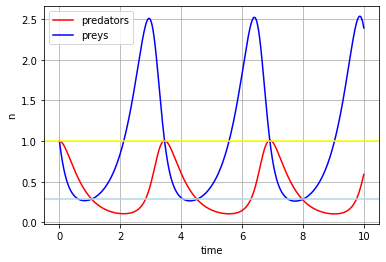

In [ ]:
biome.plot()

> на основании полученной циклической зависимости можно сделать вывод, что (как-то надо исходную функцию дописать)

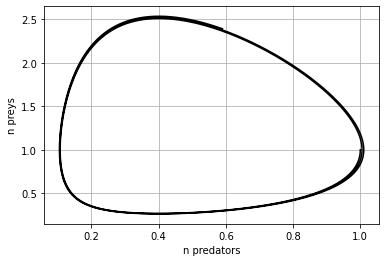

In [ ]:
biome.plot_cycle()

2\. Исследуем ситуацию на устойчивость: найдем якобиан и собственные значения. 

Рассматривать будем в двух случаях: 
1. Имиграция травоядных в среду
2. Имиграция хищников в среду

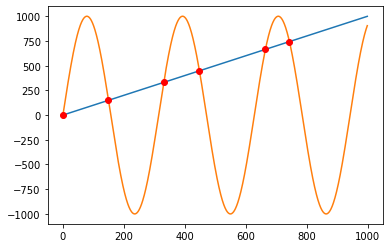